In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
np.set_printoptions(threshold=np.inf)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/test.csv')

In [5]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [18]:
all_data = pd.concat([train, test], sort=False)

In [19]:
all_data['Dates'] = pd.to_datetime(all_data['Dates'])

all_data['Year'] = all_data['Dates'].dt.year
all_data['Month'] = all_data['Dates'].dt.month
all_data['Day'] = all_data['Dates'].dt.day
all_data['Hour'] = all_data['Dates'].dt.hour
all_data['Minute'] = all_data['Dates'].dt.minute
all_data['Second'] = all_data['Dates'].dt.second
all_data['DayOfWeek'] = all_data['Dates'].dt.dayofweek

all_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,Year,Month,Day,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,2015,5,13,23,30,0


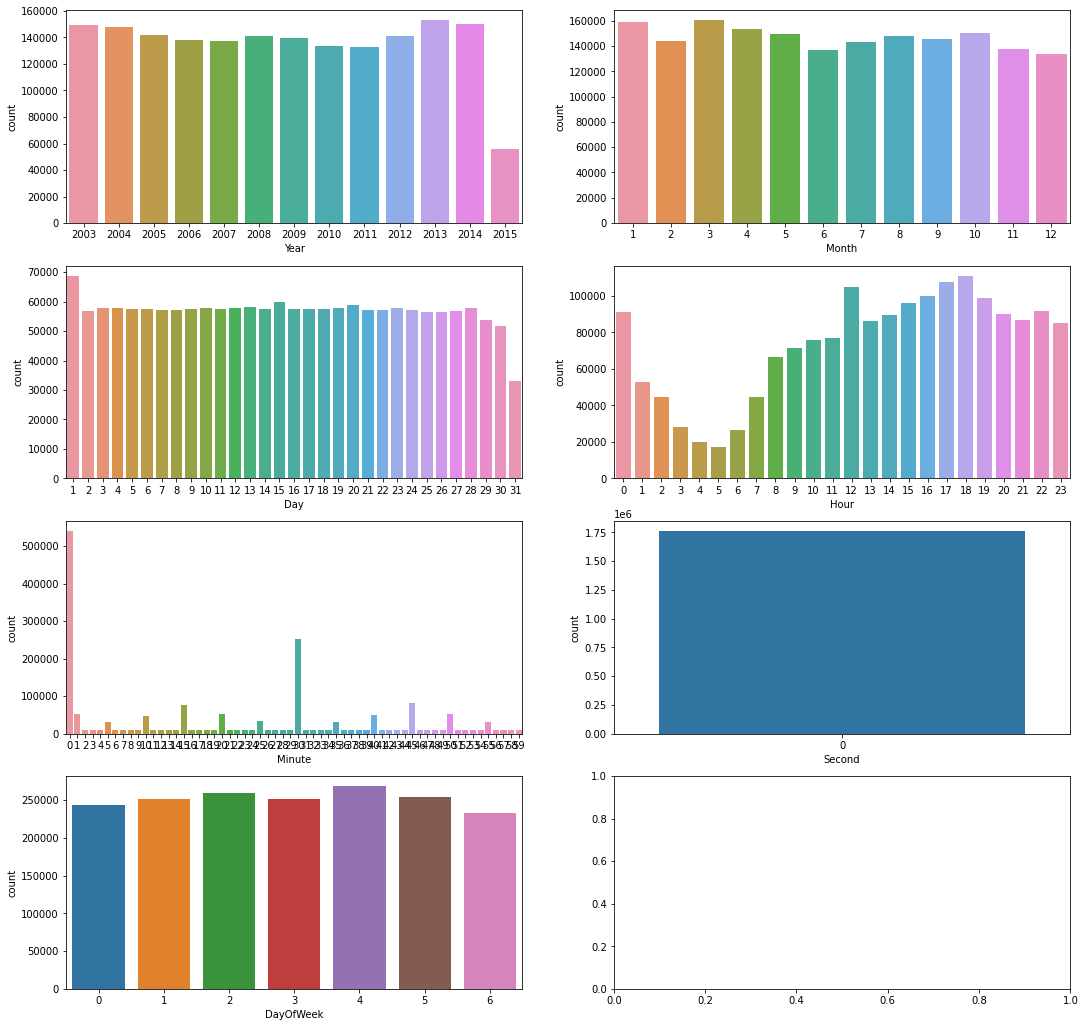

In [20]:
figure, ((ax01, ax02), (ax03, ax04), (ax11, ax12), (ax13, ax14)) = plt.subplots(nrows=4, ncols=2)

figure.set_size_inches(18, 18)


sns.countplot(data=all_data, x='Year', ax=ax01)
sns.countplot(data=all_data, x='Month', ax=ax02)
sns.countplot(data=all_data, x='Day', ax=ax03)
sns.countplot(data=all_data, x='Hour', ax=ax04)
sns.countplot(data=all_data, x='Minute', ax=ax11)
sns.countplot(data=all_data, x='Second', ax=ax12)
sns.countplot(data=all_data, x='DayOfWeek', ax=ax13)

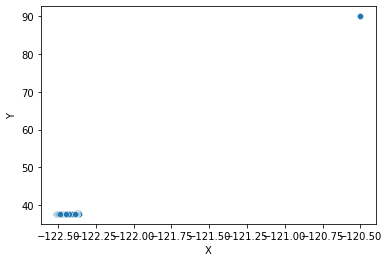

In [21]:
sns.scatterplot(data=all_data, x='X', y='Y')

(143, 16)


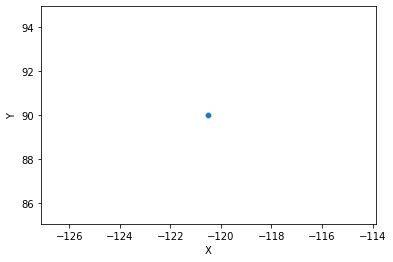

In [22]:
outlier = all_data[((all_data['X'] == all_data['X'].max()) | (all_data['Y'] == all_data['Y'].max()))]

print(outlier.shape)
sns.scatterplot(data=outlier, x='X', y='Y')

(1762168, 16)


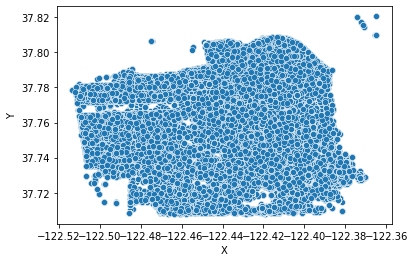

In [23]:
nonOutlier = all_data[~((all_data['X'] == all_data['X'].max()) | (all_data['Y'] == all_data['Y'].max()))]

print(nonOutlier.shape)
sns.scatterplot(data=nonOutlier, x='X', y='Y')

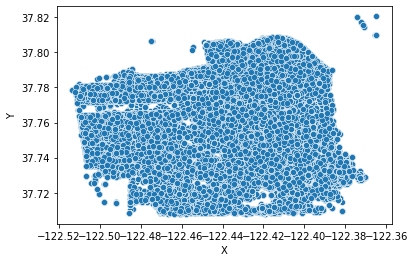

In [24]:
all_data.loc[all_data['X'] == all_data['X'].max(), 'X'] = all_data['X'].median()
all_data.loc[all_data['Y'] == all_data['Y'].max(), 'Y'] = all_data['Y'].median()
sns.scatterplot(data=all_data, x='X', y='Y')

In [25]:
all_data['X+Y'] = all_data['X'] + all_data['Y']
all_data['X-Y'] = all_data['X'] - all_data['Y']

In [29]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [30]:
all_data['PdDistrict'] = lb.fit_transform(all_data['PdDistrict'])

In [40]:
all_data['Address'].unique()

array(['OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST',
       '1500 Block of LOMBARD ST', '100 Block of BRODERICK ST',
       '0 Block of TEDDY AV', 'AVALON AV / PERU AV',
       'KIRKWOOD AV / DONAHUE ST', '600 Block of 47TH AV',
       'JEFFERSON ST / LEAVENWORTH ST', '0 Block of ESCOLTA WY',
       'TURK ST / JONES ST', 'FILLMORE ST / GEARY BL',
       '200 Block of WILLIAMS AV', '0 Block of MENDELL ST',
       'EDDY ST / JONES ST', 'GODEUS ST / MISSION ST',
       'MENDELL ST / HUDSON AV', '100 Block of JONES ST',
       '200 Block of EVELYN WY', '1600 Block of VALENCIA ST',
       'FILLMORE ST / LOMBARD ST', '300 Block of OFARRELL ST',
       '2000 Block of BUSH ST', '500 Block of COLLEGE AV',
       '19TH AV / SANTIAGO ST', '2000 Block of 41ST AV',
       '1300 Block of WEBSTER ST', '400 Block of CASTRO ST',
       '1500 Block of FILLMORE ST', '1600 Block of WEBSTER ST',
       'KING ST / 3RD ST', 'VALLEJO ST / BUCHANAN ST',
       'CALIFORNIA ST / BUCHANAN ST', '1400 Block of

In [53]:
def distinguishAv(tt):
  tt = tt.replace(' of ', ' / ')
  splited = tt.split(' / ')
  for s in splited:
    if s.endswith(' AV'):
      return s
  return ''

def distinguishSt(tt):
  tt = tt.replace(' of ', ' / ')
  splited = tt.split(' / ')
  for s in splited:
    if s.endswith(' ST'):
      return s
  return ''

all_data['AV'] = all_data['Address'].apply(distinguishAv)
all_data['ST'] = all_data['Address'].apply(distinguishSt)

In [60]:
print(len(all_data['AV'].unique()))
print(len(all_data['ST'].unique()))
print(len(all_data))
len(all_data.loc[(all_data['AV'] == '') & (all_data['ST'] == ''), 'Address'])


458
912
1762311


101164

In [61]:
all_data['AV'] = lb.fit_transform(all_data['AV'])
all_data['ST'] = lb.fit_transform(all_data['ST'])

In [ ]:
category_list = train['Category'].unique()
print(train['Category'].value_counts().index)
category_list

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'DRIVING UNDER THE INFLUENCE', 'RUNAWAY', 'LIQUOR LAWS', 'ARSON',
       'LOITERING', 'EMBEZZLEMENT', 'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS',
       'BRIBERY', 'EXTORTION', 'SEX OFFENSES NON FORCIBLE', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype='object')


array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [ ]:
print('category_list : '+(str)(len(category_list)))
print('train[\'Category\'] : '+(str)(len(train['Category'])))

category_list : 39
train['Category'] : 878049


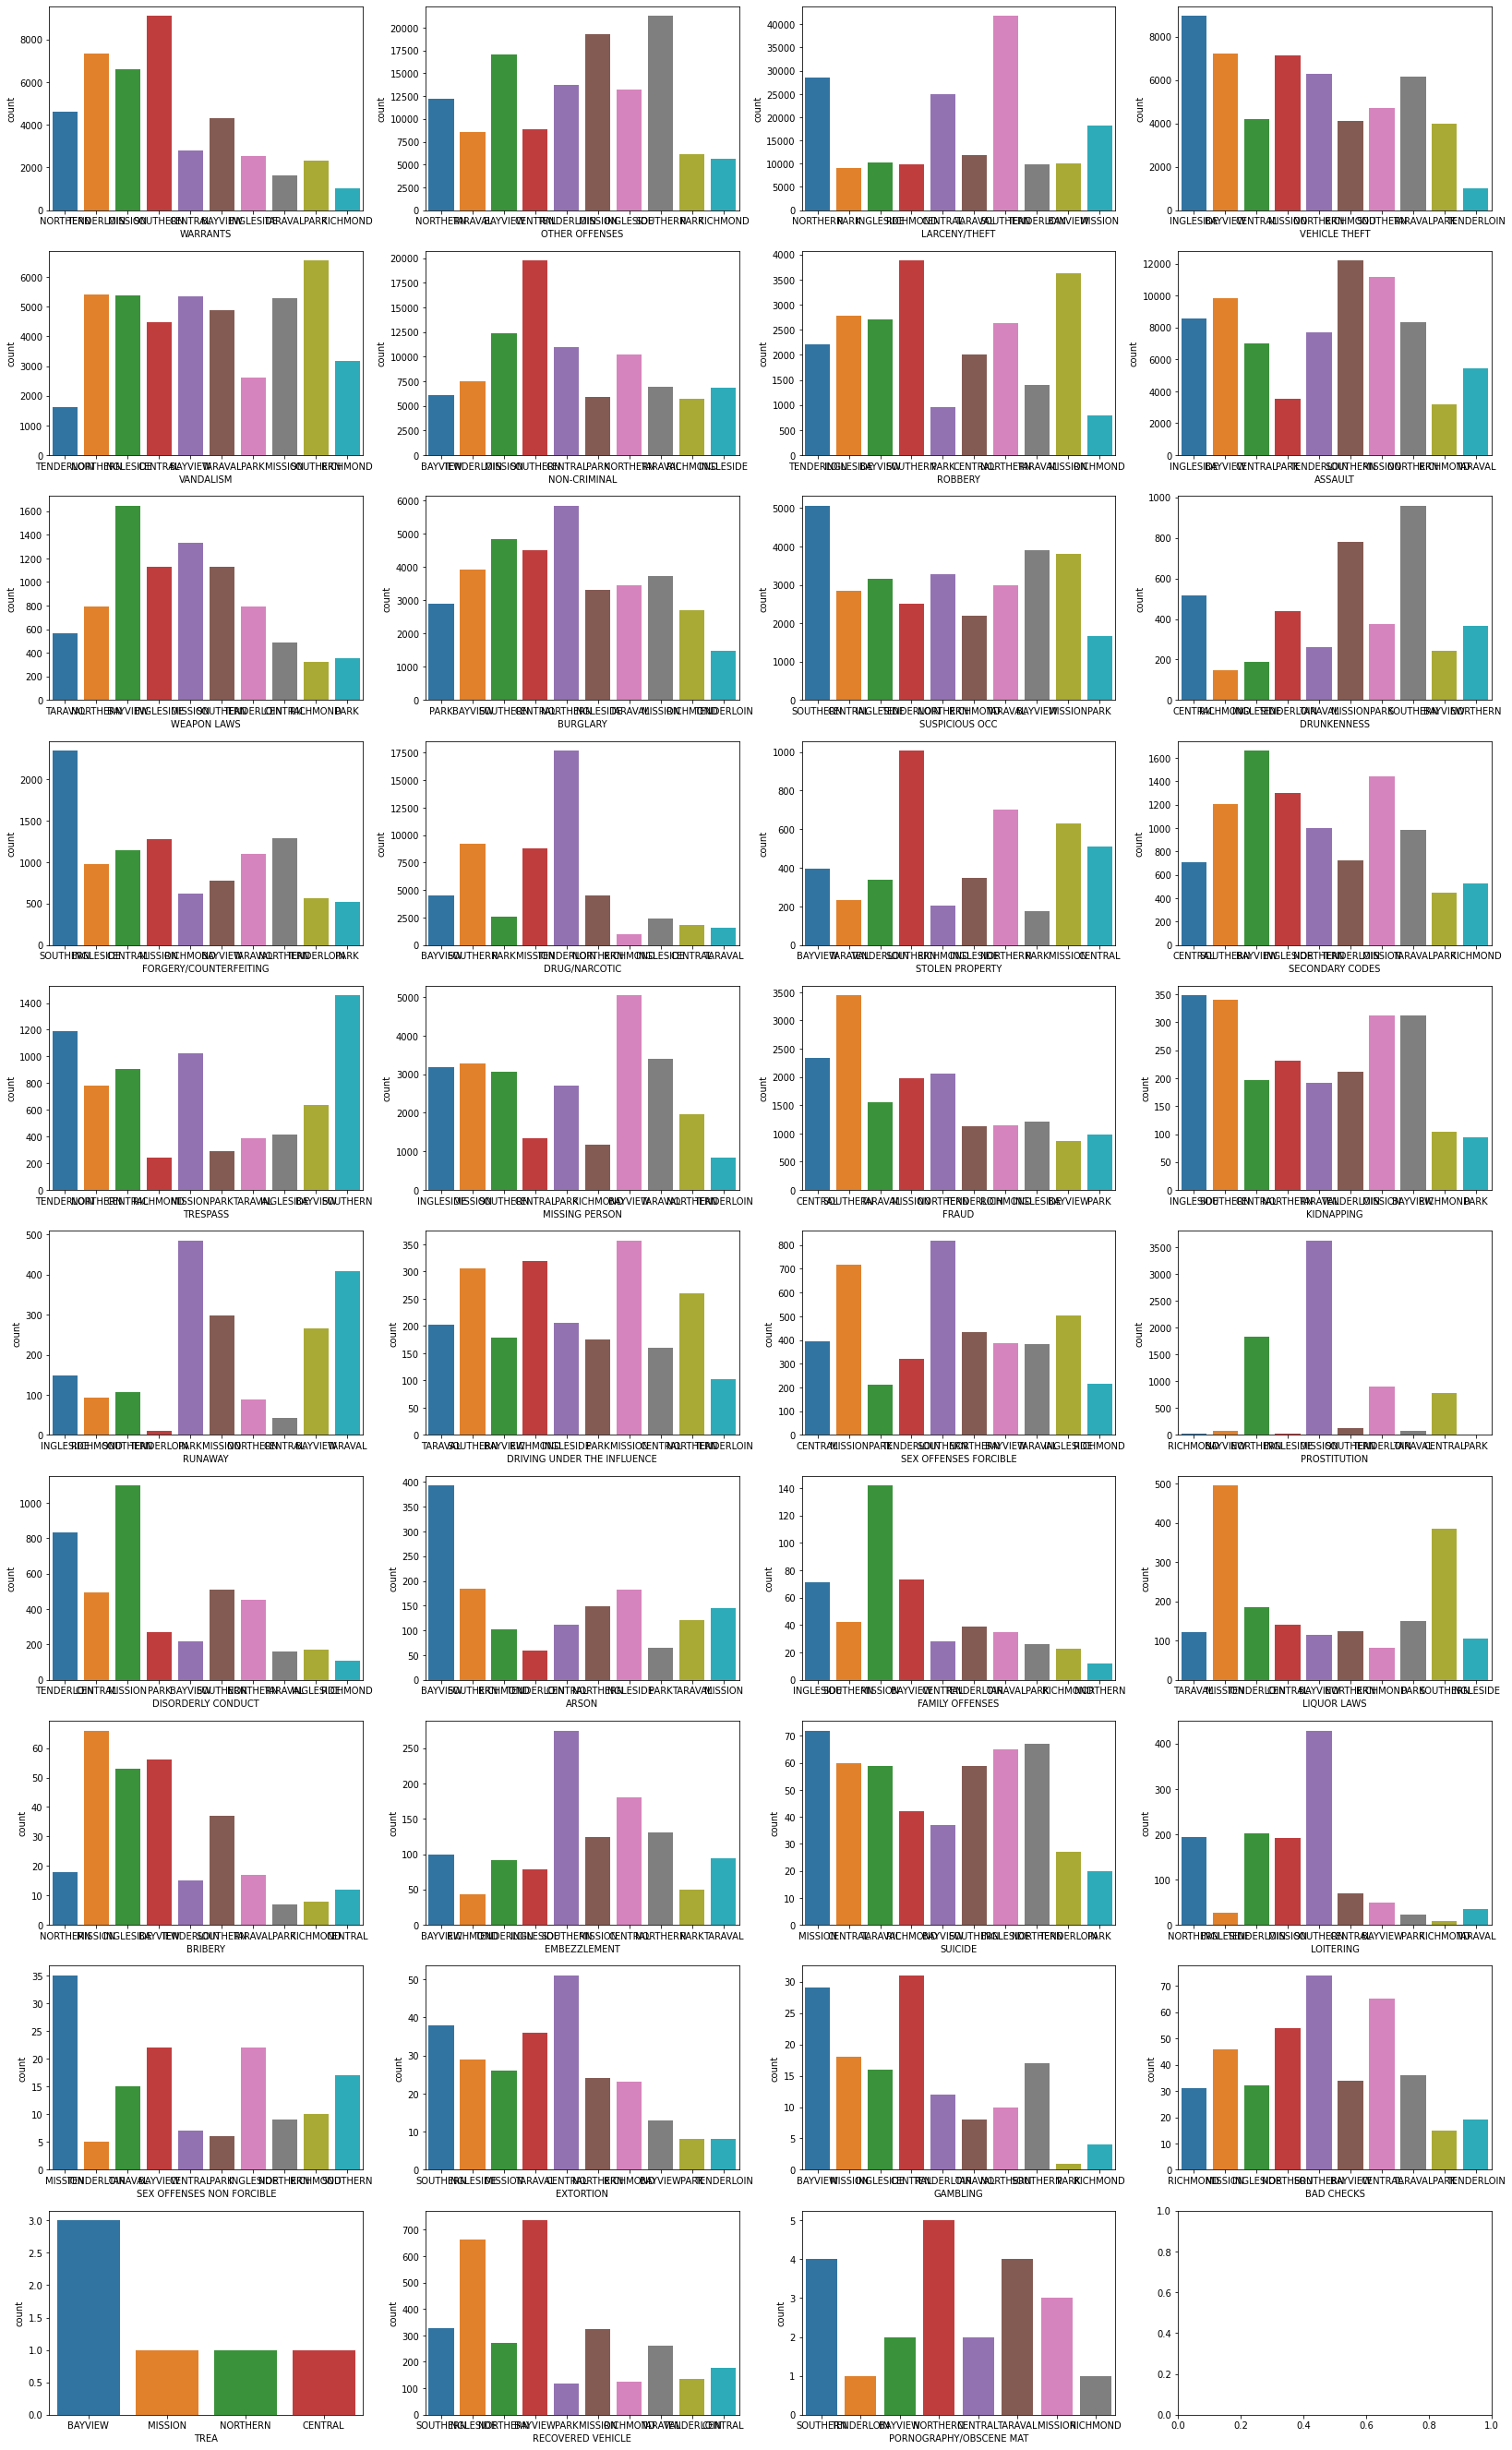

In [ ]:
figure, axes = plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(28, 48)

count = 0

for i in range(10):
    for j in range(4):
        ax = axes[i][j]
        
        graph = train[train['Category'] == category_list[count]]
        sns.countplot(data=graph, x='PdDistrict', ax=ax)
        ax.set(xLabel = category_list[count])
        count+=1
        if len(category_list) <= count:
            break
        

In [ ]:
train.columns

In [ ]:
train['DayOfWeek'].unique()

In [ ]:
train["PdDistrict"].unique()

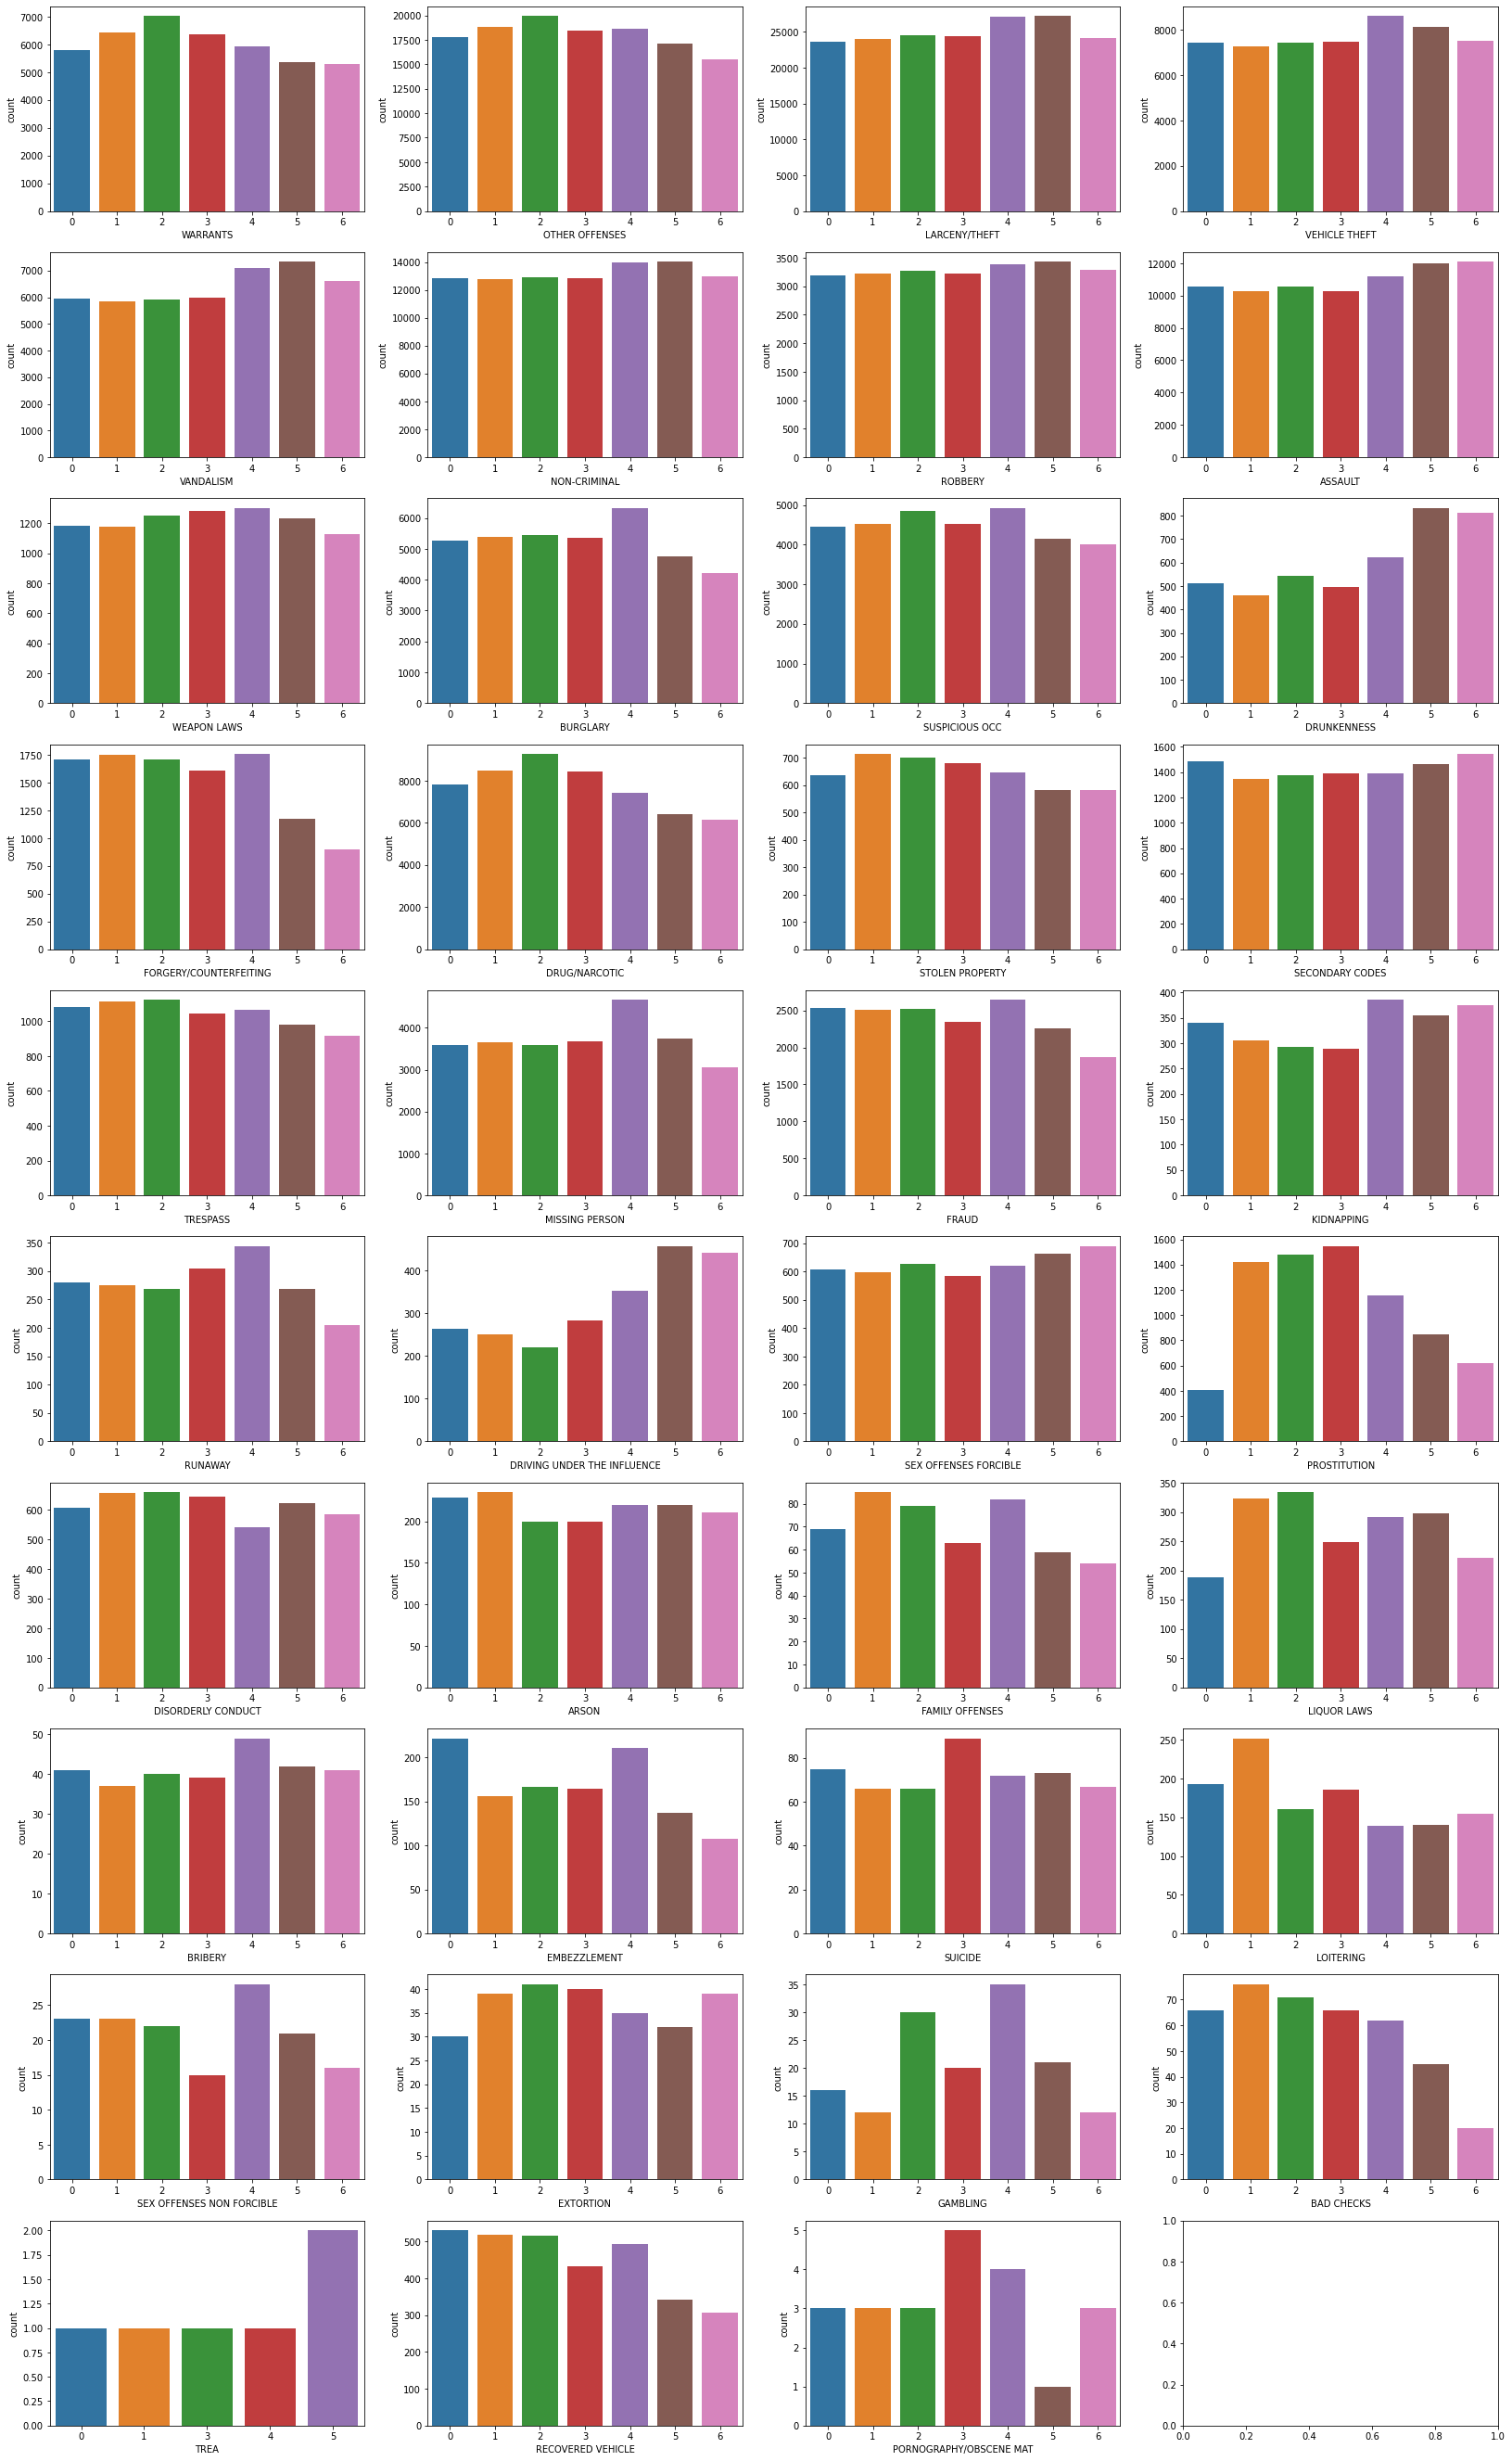

In [ ]:
figure, axes = plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(28, 48)
idx = 0

for i in range(10):
    for j in range(4):
        ax = axes[i][j]
        
        graph = train[train['Category'] == category_list[idx]]
        sns.countplot(data=graph, x='DayOfWeek', ax=ax)
        ax.set(xLabel=category_list[idx])
        idx+=1
        if idx >= len(category_list):
            break

In [ ]:
print(train.columns)
train["PdDistrict"].unique()

In [ ]:
import numpy as np

p_list = ['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN']

for i in p_list:
    train[i+'(oh)'] = train['PdDistrict'] == i
    
    
for i in p_list:
    test[i+'(oh)'] = test['PdDistrict'] == i
    
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second,NORTHERN(oh),PARK(oh),INGLESIDE(oh),BAYVIEW(oh),RICHMOND(oh),CENTRAL(oh),TARAVAL(oh),TENDERLOIN(oh),MISSION(oh),SOUTHERN(oh)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,True,False,False,False,False,False,False,False,False,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,True,False,False,False,False,False,False,False,False,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,True,False,False,False,False,False,False,False,False,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,True,False,False,False,False,False,False,False,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,False,True,False,False,False,False,False,False,False,False


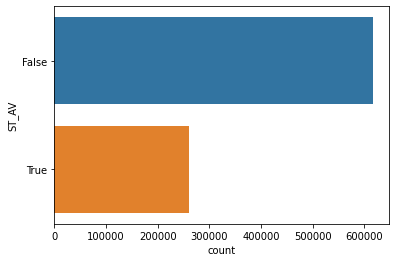

In [ ]:
train['ST_AV'] = train['Address'].str.contains('/')

test['ST_AV'] = test['Address'].str.contains('/')

sns.countplot(data=train, y='ST_AV')

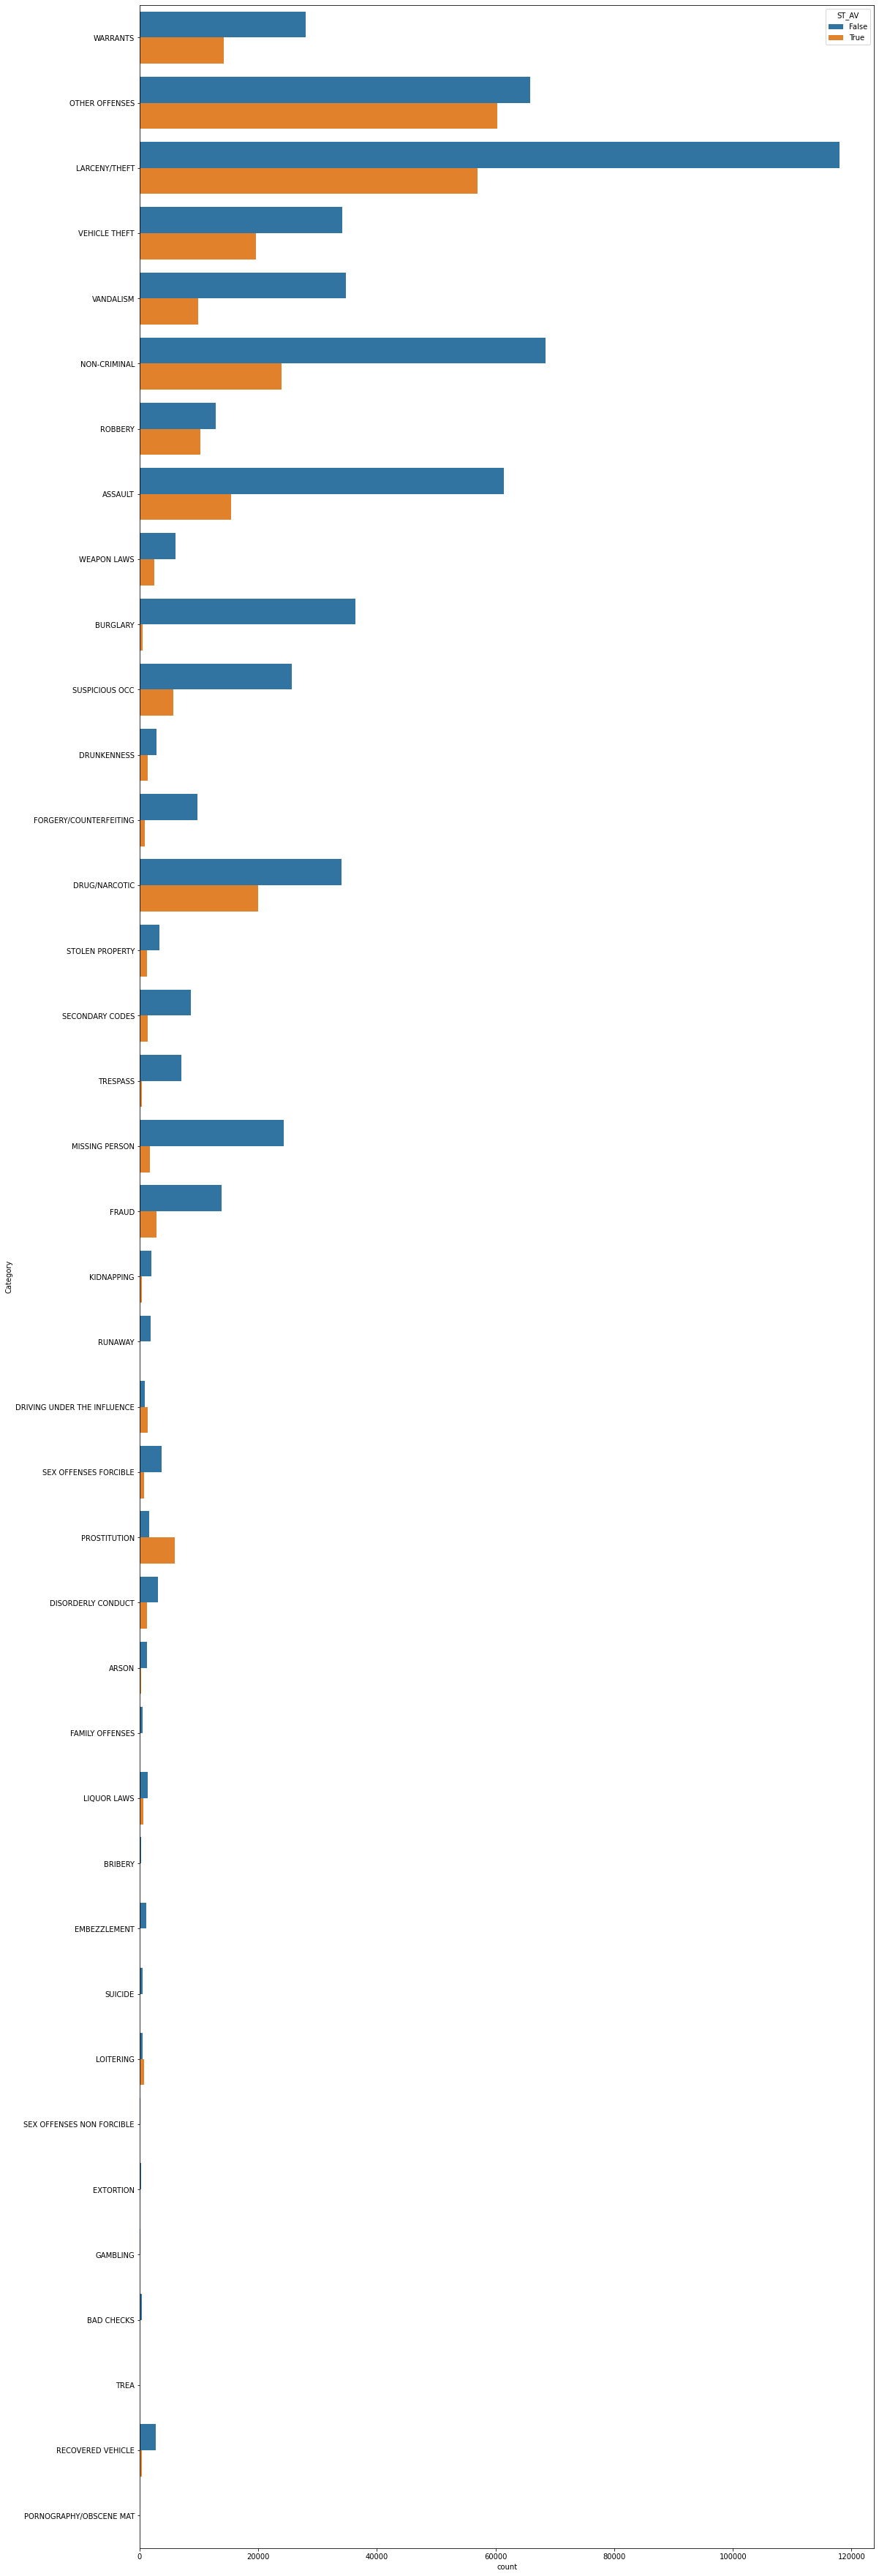

In [ ]:
plt.figure(figsize = (18, 64))
sns.countplot(data=train, y='Category', hue='ST_AV')

In [92]:
all_data['Resolution'] = lb.fit_transform(all_data['Resolution'])

TypeError: ignored

In [94]:
na_check = all_data.isna().sum() / len(all_data)
na_check

Dates         0.000000
Category      0.501763
Descript      0.501763
DayOfWeek     0.000000
PdDistrict    0.000000
Resolution    0.501763
Address       0.000000
X             0.000000
Y             0.000000
Id            0.498237
Year          0.000000
Month         0.000000
Day           0.000000
Hour          0.000000
Minute        0.000000
Second        0.000000
X+Y           0.000000
X-Y           0.000000
AV            0.000000
ST            0.000000
dtype: float64

In [96]:
nTrain = len(train)
train = all_data[:nTrain]
test = all_data[nTrain:]

In [112]:
features_names = ['DayOfWeek', 'PdDistrict',
       'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'X+Y', 'X-Y', 'AV', 'ST']
results_names = 'Category'

train_x = train[features_names]
train_y = train[results_names]

test_x = test[features_names]

In [113]:
col_y = train_y.unique()

In [114]:
col_y

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [116]:
import xgboost as xgb
train_xgb = xgb.DMatrix(train_x, label=target)
test_xgb  = xgb.DMatrix(test_x)

NameError: ignored

In [111]:
params = {
    'max_depth': 4,  
    'eta': 0.3,  
    'silent': 1, 
    'objective': 'multi:softprob', 
    'num_class': 39,
}

xg = xgb.cv(params, train_xgb, nfold=3, early_stopping_rounds=10, metrics='mlogloss', verbose_eval=True) 

ValueError: ignored

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/sampleSubmission.csv')

In [ ]:
for idx in range(0, len(pred)):
  submission[pred[idx]][idx] = 1

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
submission.set_index('Id')
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/submission.csv', index=False)